# <font color='blue'>Decomposição em Valores Singulares<br><br> (Singular Value Decomposition  - SVD)</font>

## Solução dos Exercícios

## Luis Gustavo Nonato  

ICMC-USP

----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Exercício 1) 
Considere a matriz $\mathbf{A}$ abaixo cujos elementos são números inteiros no intervalo $[0,10)$ gerados randomicamente. Suponha que as colunas de $\mathbf{A}$ sejam pontos em um espaço $\mathbb{R}^n$. 

a) Qual o posto da matriz $\mathbf{A}$?

b) Encontre a matriz com metade do posto de $\mathbf{A}$ que melhor aproxima $\mathbf{A}$.

c) Qual o erro de aproximação na norma $L^2$?

In [2]:
n = 20
A = np.random.randint(0,10,size=(n,n))

$$
det(A) = det(U\Sigma V^\top)=det(\Sigma)=\prod_{i=1}^n \sqrt{\lambda_i}
$$

In [4]:
U,S,Vt = np.linalg.svd(A)

print('Algum valor singular zero? ',np.any(S<1.0e-7)) # verificando se algum valor singular é zero

# Se nenhum valor singular de A é zero,  
# A é inversível (como você justifica esta afirmação), 
# logo A tem posto completo igual a len(S)

r = int(len(S)*0.5)

# Ar = UrSrVr^T
Ar = np.dot(U[:,:r],np.dot(np.diag(S[:r]),Vt[:r,:]))

error = np.linalg.norm(A.ravel() - Ar.ravel())**2 
print('Erro de aproximação: ',error)

Algum valor singular zero?  False
Erro de aproximação:  366.2500191104291


### Exercício 2)
Calcule o erro de aproximação do exercício anterior utilizando os valores singulares e justifique sua resposta:

In [5]:
# O erro de aproximação é dada pela soma dos m-r menores 
# autovalores de A^TA (ou AA^T). Este fato é uma consequência
# da demonstração da propriedade de aproximação de posto reduzido.

print('Erro de aproximação: ',np.sum(S[r:]**2))

Erro de aproximação:  366.250019110429


### Exercício 3) 
Considere o conjunto de pontos, gerados na célula abaixo, armazenados como colunas da matriz $\mathbf{X}$.

a) Faça um scatter plot dos pontos e note que eles estão alinhados com uma reta, porém possuem um grau de ruído. 

b) Utilize SVD para remover o ruido dos dados, alinhando-os mais precisamente à forma de uma reta.

In [13]:
n = 100
t = np.linspace(0,1,n)
X = np.zeros((2,n))
X[0,:] = 2*t
X[1,:] = X[0,:]+np.random.uniform(-0.3,0.3,n)

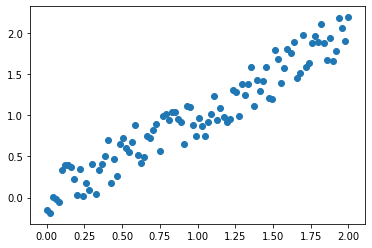

In [8]:
plt.scatter(X[0,:],X[1,:])

(2, 100)


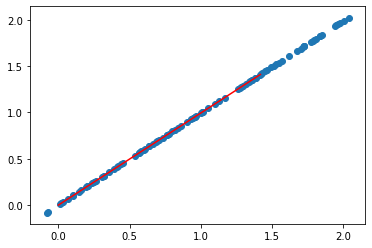

In [17]:
U,S,Vt = np.linalg.svd(X)  # calculando SVD
 
X1 = U[:,0].reshape(-1,1)*(S[0]*Vt[0,:].reshape(1,-1)) # zerando a segunda direção principal
print(X1.shape)

plt.scatter(X1[0,:],X1[1,:])
plt.plot([0,-2*U[0,0]],[0,-2*U[1,0]],color='r')  # plotando a direcao principal

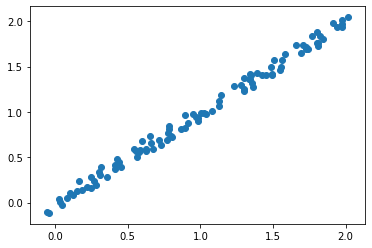

In [18]:
# na verdade podemos suavizar o ruido ao invez de zerá-lo
suaviza = 0.3

S[1] = S[1]*suaviza
Xc = np.dot(U,np.dot(np.diag(S),Vt[:2,:]))

plt.scatter(Xc[0,:],Xc[1,:])

### Exercício 4)
Considere a matriz abaixo onde as colunas correspondem às direções principais de um conjunto de dados no espaço $\mathbb{R}^7$. Sabendo que as colunas estão ordenadas de acordo com as variâncias dos dados em ordem decrescente da esquerda para a direita e que as variâncias estão igualmente espaçadas no intervalo $[1^{-3},2]$. Construa um conjunto de $n$ pontos $\mathbf{X}$ (cada ponto é uma coluna de $\mathbf{X}$) cujas direções principais são dadas pela matriz abaixo.

$$
\begin{bmatrix}
-0.28 & -0.76  & 0.33  & 0.39 & -0.11 & -0.15 &  0.2 \\
-0.47  & 0.41  & 0.17  & 0.58 & -0.12  & 0.39 & -0.27\\
-0.41 & -0.29 & -0.21 & -0.48 & -0.04  & 0.68  & 0.1 \\
-0.32 & -0.1  & -0.76  & 0.27 &  0.41 & -0.25 & -0.05\\
-0.36 & -0.02  & 0.43 & -0.35 & 0.53 & -0.24 & -0.48\\
-0.46  & 0.15 & -0.12 & -0.28 & -0.66 & -0.48 &  -0.05\\
-0.3  &  0.36 &  0.2  & -0.05  & 0.29 & -0.1 &   0.8 
\end{bmatrix}
$$

Verifique a corretude dos dados gerados calculando suas direções principais associadas.

In [39]:
import numpy as np

U = np.asarray([[-0.28, -0.76,  0.33,  0.39, -0.11, -0.15,  0.2 ],
                [-0.47,  0.41,  0.17,  0.58, -0.12,  0.39, -0.27],
                [-0.41, -0.29, -0.21, -0.48, -0.04,  0.68,  0.1 ],
                [-0.32, -0.10, -0.76,  0.27,  0.41, -0.25, -0.05],
                [-0.36, -0.02,  0.43, -0.35,  0.53, -0.24, -0.48],
                [-0.46,  0.15, -0.12, -0.28, -0.66, -0.48, -0.05],
                [-0.30,  0.36,  0.20, -0.05,  0.29, -0.10,   0.8]]) 

# sabemos que a matriz de dados X deve respeitar
# X = USV^T. Como conhecemos U e S, temos a liberdade de
# escolher os autovetores de X^TX que dão origem à V. 
# Qualquer base ortonormal pode ser utilizada para 
# construir X^TX = VSV^T

# gerando os autovalores
S = np.linspace(1e-3,2,U.shape[0])[::-1]
print(S)

# calculando V
# vamos assumir n=20 e construir uma base ortogonal com 20 vetores
# utilizando Gram Schmidt

T = np.random.uniform(0,1,size=(20,20))
V, R = np.linalg.qr(T)

# calculando uma base ortonormal como 
X = np.dot(U,np.dot(np.diag(np.sqrt(S)),V[:,:S.shape[0]].T))

np.set_printoptions(precision=2)
print(X[:,:6])

[2.00e+00 1.67e+00 1.33e+00 1.00e+00 6.67e-01 3.34e-01 1.00e-03]
[[-0.33  0.22 -0.21  0.24  0.56  0.22]
 [ 0.19 -0.05  0.16 -0.1   0.4   0.13]
 [ 0.18  0.38 -0.14  0.48  0.03  0.11]
 [-0.24  0.36  0.35  0.33 -0.05  0.02]
 [ 0.25  0.27 -0.04 -0.05  0.31  0.11]
 [ 0.21 -0.07  0.18  0.27  0.11  0.33]
 [ 0.28  0.04  0.12 -0.13  0.17  0.06]]


In [60]:
# verificando corretude

Sx,Ux = np.linalg.eigh(np.dot(X,X.T)) # autovetores da matrix de covariancia
Sx = Sx[::-1]            # invertendo a ordem para decrescente
Ux = np.flip(Ux,axis=1)
print(Sx)

for i in range(X.shape[0]):
    print(np.dot(Ux[:,i].T,U[:,i]))

[2.00e+00 1.65e+00 1.33e+00 9.96e-01 6.65e-01 3.33e-01 9.98e-04]
1.0004686320503846
-0.9961059507779878
0.9992666102033042
0.9974538340120045
0.9983178095946099
-0.9987293091560934
-0.9991191681905718


### Exercício 5)
Construa uma transformação linear que leve os vetores $v_1=[1,0,1]$ e $v_2=[0,1,0]$ nos vetores $u_1=[2,1]$ e $u_2=[-0.5,1]$. Verifique a corretude da transformação construida.

In [11]:
import numpy as np
# Solução

# Note que os vetores u1,u2 são ortogonais e que v1,v2 tambem sao ortogonais
# logo, podem ser considerados com colunas da decomposição SVD da trasnformação procurada,
# porem os vetores precisam ter norma 1
# Os elementos da matriz diagonal envolvida no SVD devem ser escalares que garantam as
# escalas adequadas

u1 = np.array([2,1])
nu1 = np.linalg.norm(u1)

u2 = np.array([-0.5,1])
nu2 = np.linalg.norm(u2)

v1 = np.array([1,0,1])
nv1 = np.linalg.norm(v1)

v2 = np.array([0,1,0])
nv2 = np.linalg.norm(v2)

U = np.zeros((2,2))
U[:,0] = u1/nu1
U[:,1] = u2/nu2

Vt = np.zeros((2,3))
Vt[0,:] = v1/nv1
Vt[1,:] = v2/nv2

s1 = (nu1/nv1)**2
s2 = (nu2/nv2)**2
S = np.diag(np.sqrt(np.array([s1,s2])))

A = np.linalg.multi_dot([U,S,Vt])

print('A imagem de',v1,'é',np.dot(A,v1))
print('A imagem de',v2,'é',np.dot(A,v2))

A imagem de [1 0 1] é [2. 1.]
A imagem de [0 1 0] é [-0.5  1. ]


### Exercício 6)
Considere a matriz gerada na célula abaixo, cujas colunas correspondem a pontos em um espaço de dimensão $20$. Utilize análise de componentes principais (calculada via SVD) para projetar os pontos em um espaço de dimensão 2 e visualize os pontos projetados através de um scatter plot.

In [12]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(200,20)
X = X.T

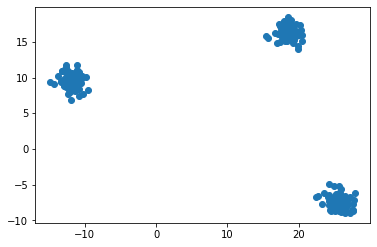

In [13]:
U,S,Vt = np.linalg.svd(X)  # calculando SVD

X_projetado = np.dot(np.diag(S[:2]),Vt[:2,:])  # projeção nas duas direções principais
  
fig, ax = plt.subplots(1,1)
ax.set_aspect('equal')
ax.scatter(X_projetado[0,:],X_projetado[1,:])